Author : Richard A. Wolf  
Last update : April 2024  
Sources : this notebook is based on [Craig Gidney's "getting started" notebook](https://github.com/quantumlib/Stim/blob/main/doc/getting_started.ipynb) introducing the [Stim library](https://github.com/quantumlib/Stim)

In [1]:
import numpy as np
import stim

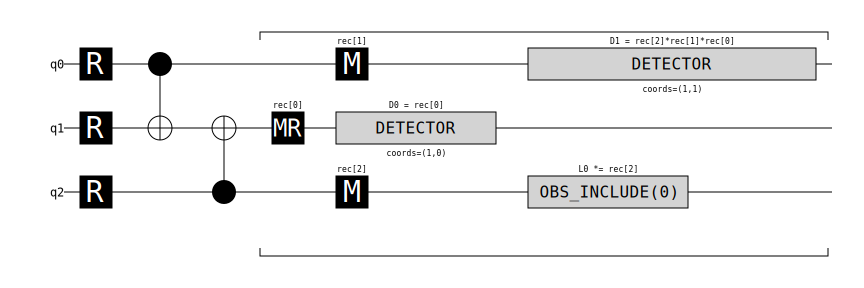

In [5]:
# Step 1
stim_code = stim.Circuit.generated("repetition_code:memory", rounds=1, distance=2)
stim_code.diagram('timeline-svg')

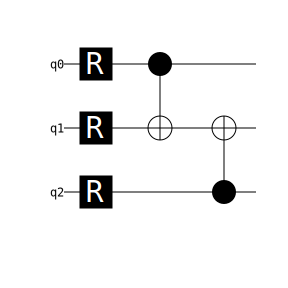

In [6]:
# Step 2
def make_repetition_code() -> stim.Circuit:
    """Creates a repetition code circuit."""
    code = stim.Circuit()

    for qb in range(3):                  #An R gate... 
        code.append("R", [qb])           # ... on each qubit

    code.append("CNOT", [0, 1])          #A CNOT between qubit 0 and qubit 1
    code.append("CNOT", [2, 1])          #A CNOT between qubit 1 and qubit 2

    return code

our_code = make_repetition_code()
our_code.diagram('timeline-svg')

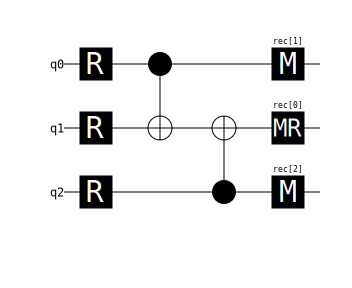

In [7]:
# Step 3
def make_repetition_code() -> stim.Circuit:
    """Creates a repetition code circuit."""
    code = stim.Circuit()

    for qb in range(3):
        code.append("R", [qb])
    code.append("CNOT", [0, 1])
    code.append("CNOT", [2, 1])

    code.append("MR", [1])    #A Z-basis measurement + reset on qubit 1
    code.append("M", [0, 2])  #Simple Z-basis measurements on qubits 0 and 2
                              # no resets here
    return code

our_code = make_repetition_code()
our_code.diagram('timeline-svg')

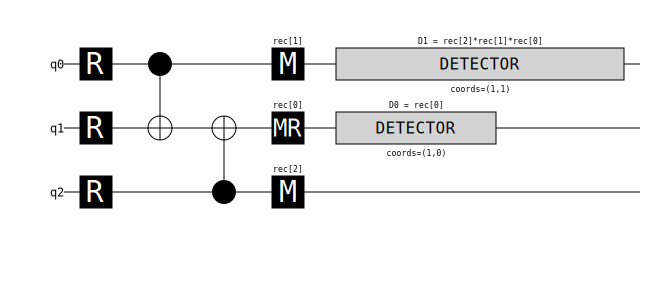

In [8]:
# Step 4A
def make_repetition_code() -> stim.Circuit:
    """Creates a repetition code circuit."""
    code = stim.Circuit()

    for qb in range(3):
        code.append("R", [qb])
    code.append("CNOT", [0, 1])
    code.append("CNOT", [2, 1])

    code.append("MR", [1])           # First measurement
    code.append("M", [0, 2])         # Second and third measurements
    
    #Measurement of interest for that detector is the 3rd 
    # most ancient stored in the record, so the first one here
    # [1,0] is a side annotations which could be ignored here
    code.append("DETECTOR", [stim.target_rec(-3)], [1,0])

    #Measurements of interest for that detector are the latest, 
    # second latest and 3rd most ancient measurements stored
    # in the record, so all of them here
    # Again, [1,1] is just an annotation that we could ignore
    code.append("DETECTOR", [ stim.target_rec(-1), 
                              stim.target_rec(-2),
                              stim.target_rec(-3)], 
                            [1,1])

    return code

our_code = make_repetition_code()
our_code.diagram('timeline-svg')

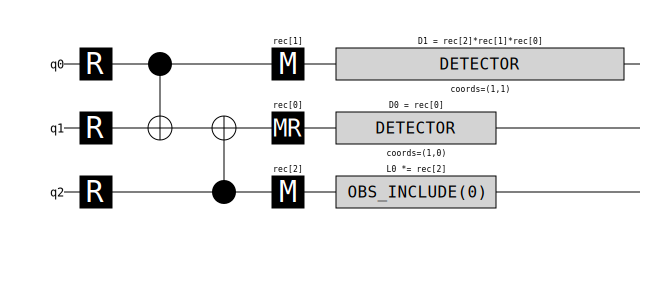

In [9]:
# Step 4B
def make_repetition_code() -> stim.Circuit:
    """Creates a repetition code circuit."""
    code = stim.Circuit()

    for qb in range(3):
        code.append("R", [qb])
    code.append("CNOT", [0, 1])
    code.append("CNOT", [2, 1])

    code.append("MR", [1])
    code.append("M", [0, 2])
    
    code.append("DETECTOR", [stim.target_rec(-3)], [1,0])
    
    # Here too, think of the pile of books, -1 is the most recent
    code.append("OBSERVABLE_INCLUDE", [stim.target_rec(-1)], 0)

    code.append("DETECTOR", [ stim.target_rec(-1),
                            stim.target_rec(-2),
                            stim.target_rec(-3)],
                            [1,1])

    return code

our_code = make_repetition_code()
our_code.diagram('timeline-svg')

In [11]:
# Step 5
depolarisation_probability = 0.03
flip_probability = 0.1

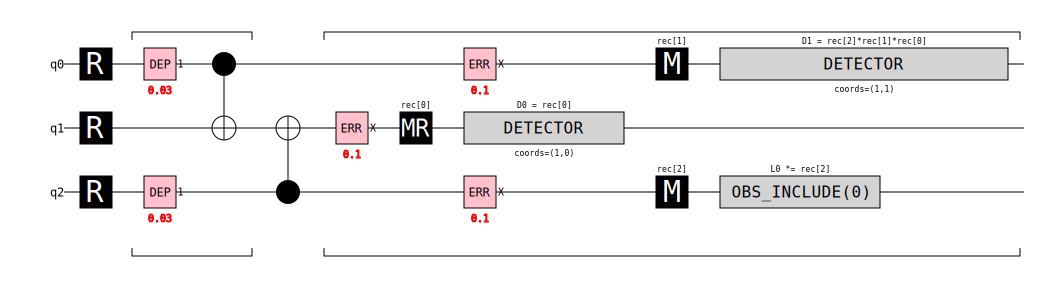

In [12]:
stim_code = stim.Circuit.generated(
              "repetition_code:memory",
              rounds=1,
              distance=2,
              before_round_data_depolarization=depolarisation_probability,
              before_measure_flip_probability=flip_probability
             )
stim_code.diagram('timeline-svg')

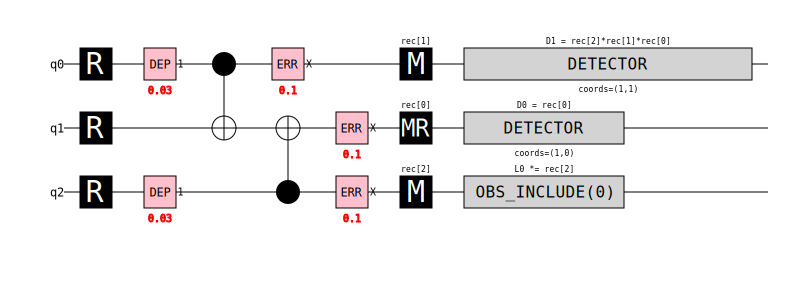

In [13]:
def make_repetition_code(depolarisation_proba:float, flip_proba:float) -> stim.Circuit:
    """Creates a repetition code circuit."""
    code = stim.Circuit()

    for qb in range(3):
        code.append("R", [qb])

    #depolarisation errors
    code.append_operation("DEPOLARIZE1", 0, depolarisation_proba)
    code.append_operation("DEPOLARIZE1", 2, depolarisation_proba)

    code.append("CNOT", [0, 1])
    code.append("CNOT", [2, 1])

    for qb in range(3): # flip errors
        code.append("X_ERROR", qb, flip_proba)
        
    code.append("MR", [1])
    code.append("M", [0, 2])
    
    code.append("DETECTOR", [stim.target_rec(-3)], [1,0])
    code.append("OBSERVABLE_INCLUDE", [stim.target_rec(-1)], 0)
    code.append("DETECTOR", [ stim.target_rec(-1), stim.target_rec(-2), stim.target_rec(-3)], [1,1])

    return code

our_code = make_repetition_code(depolarisation_probability, flip_probability)
our_code.diagram('timeline-svg')

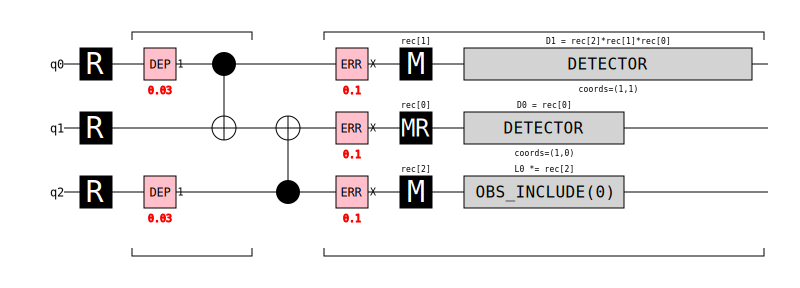

In [15]:
# Wrapping up
def make_repetition_code(depolarisation_proba:float=0.1, flip_proba:float=0.1) -> stim.Circuit:
    """Creates a repetition code circuit."""
    code = stim.Circuit()

    for qb in range(3):
        code.append("R", [qb])

    ############################## Tick start
    code.append("TICK")

    code.append_operation("DEPOLARIZE1", 0, depolarisation_proba)
    code.append_operation("DEPOLARIZE1", 2, depolarisation_proba)

    code.append("CNOT", [0, 1])

    code.append("TICK")
    ############################## Tick end

    code.append("CNOT", [2, 1])

    ############################## Tick start
    code.append("TICK")

    for qb in range(3):
        code.append("X_ERROR", qb, flip_proba)
        
    code.append("MR", [1])
    code.append("M", [0, 2])
    
    code.append("DETECTOR", [stim.target_rec(-3)], [1,0])
    code.append("OBSERVABLE_INCLUDE", [stim.target_rec(-1)], 0)
    code.append("DETECTOR", [ stim.target_rec(-1), stim.target_rec(-2), stim.target_rec(-3)], [1,1])
    
    code.append("TICK")
    ############################## Tick end

    return code

our_code = make_repetition_code(depolarisation_probability, flip_probability)
our_code.diagram('timeline-svg')